This notebook uses the functions `sourmashconsumr::from_taxonomy_annotate_to_multi_strains()` to detect whether there are multiple strains present in the CAMI low synthetic metageome. CAMI low has 40 source genomes, 22 distinct species and 18 strains. The table below summarizes the strain content.

| Species                         | Total source strains | Real strains | Evolved strains |
| ------------------------------- | -------------------- | ------------ | --------------- |
| Anaeroplasma bactoclasticum     | 4                    | 1            | 3               |
| Hydrotalea sandarakina          | 6                    | 1            | 5               |
| Paracoccus denitrificans        | 3                    | 3            | 0               | 
| unidentified Bacillales species | 5                    | 1            | 4               |

In [ ]:
#remotes::install_github("Arcadia-Science/sourmashconsumr@ter/count-strains", force = T)

In [1]:
library(sourmashconsumr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set working directory to one level up, root of git repo
setwd("..")

In [14]:
# adjust plot size rendered inline
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

In [4]:
CAMI_taxonomy_annotate_df <- read_taxonomy_annotate("outputs/sourmash_taxonomy/CAMI_low_vs_source_genomes.with-lineages.csv")

In [9]:
# filter out "unidentified *"
CAMI_taxonomy_annotate_df <- CAMI_taxonomy_annotate_df %>%
  filter(!species %in% c("unidentified", "unidentified virus", "unidentified plasmid", "Janthinobacterium species"))

In [16]:
CAMI_multi_strain <- from_taxonomy_annotate_to_multi_strains(CAMI_taxonomy_annotate_df, plot_threshold = 0)

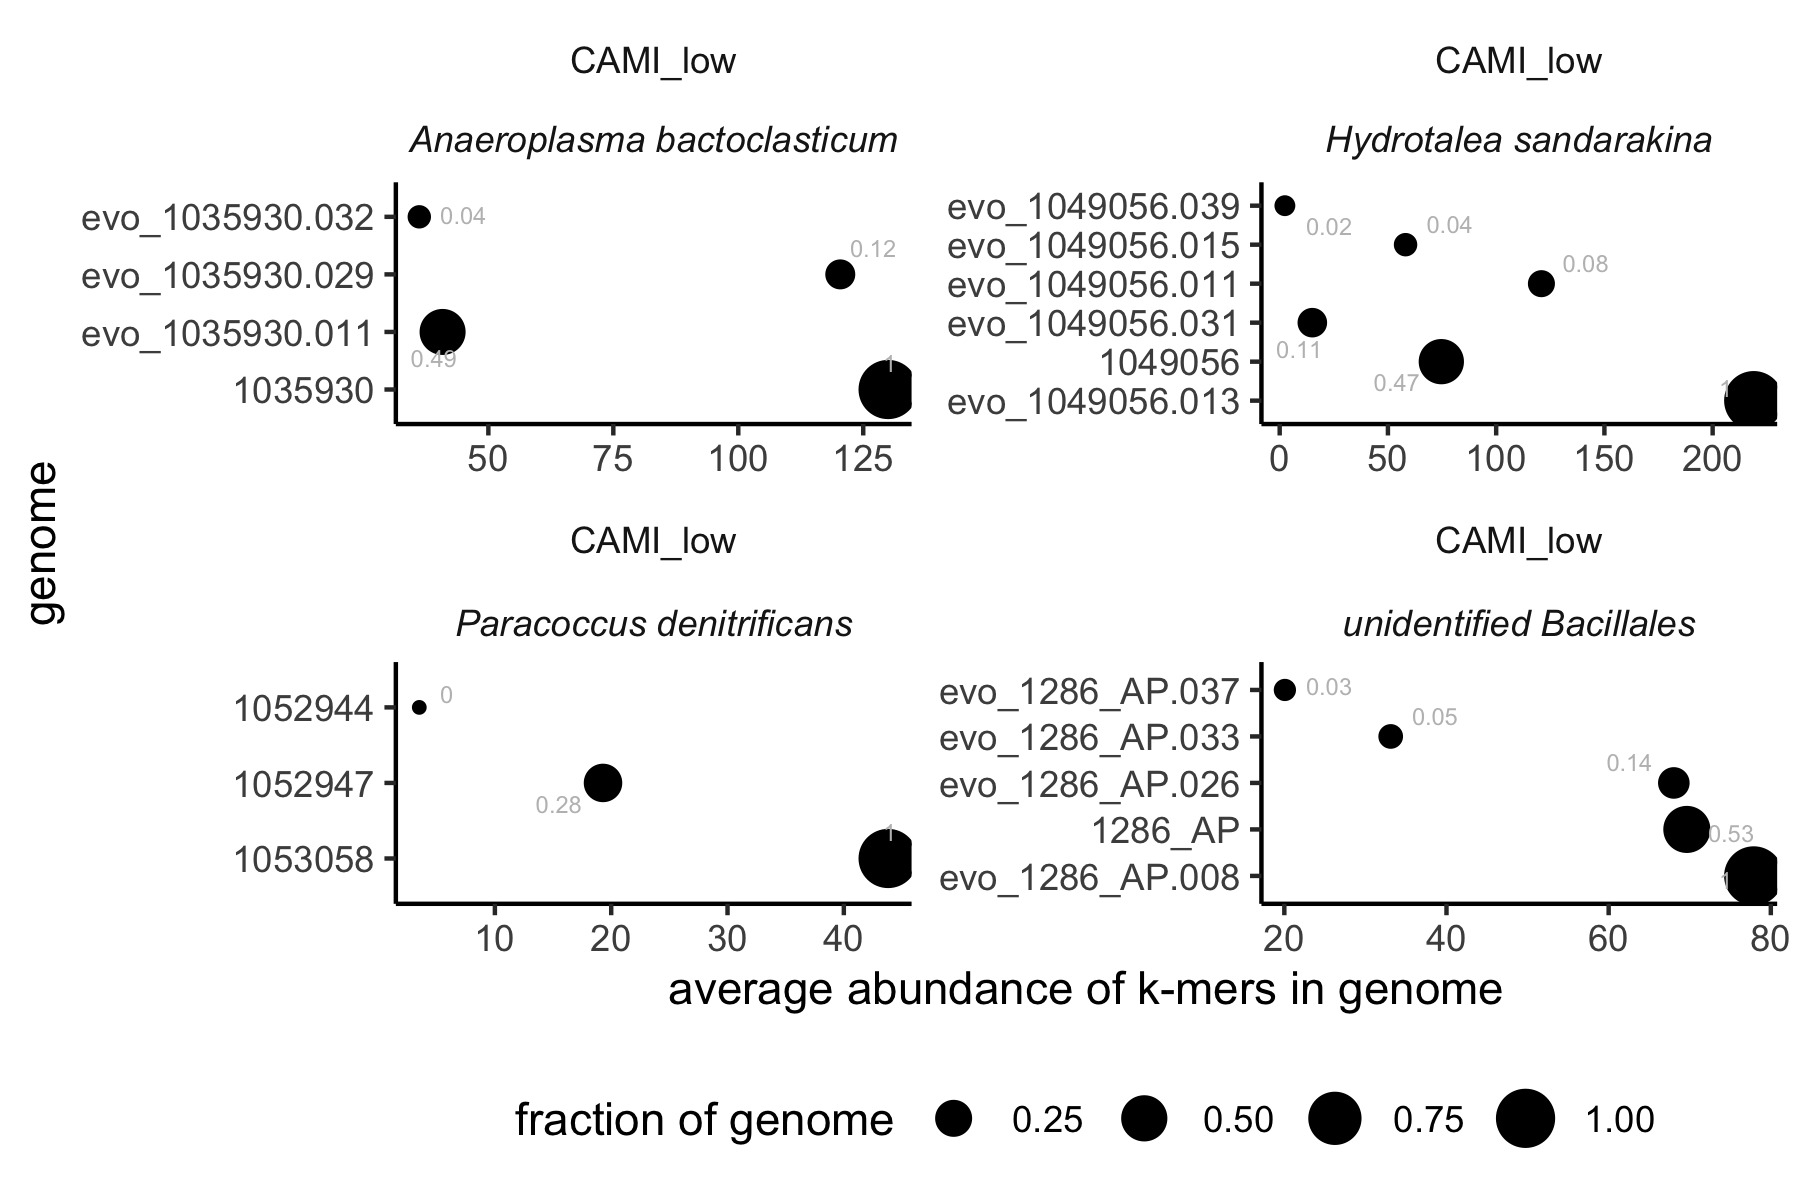

In [17]:
CAMI_multi_strain$plt +
 theme(legend.position = "bottom")

In [18]:
CAMI_multi_strain$candidate_species_with_multiple_strains

query_name,species,species_f_match,query_name_species
<chr>,<chr>,<dbl>,<chr>
CAMI_low,unidentified Bacillales,1.749984,CAMI_low-unidentified Bacillales
CAMI_low,Hydrotalea sandarakina,1.714714,CAMI_low-Hydrotalea sandarakina
CAMI_low,Anaeroplasma bactoclasticum,1.649203,CAMI_low-Anaeroplasma bactoclasticum
CAMI_low,Paracoccus denitrificans,1.284821,CAMI_low-Paracoccus denitrificans
